## Pre-Process Data

In [39]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [40]:
train_labels = []
train_samples = []

test_labels = []
test_samples = []

In [41]:
#creating fake data for the exercise

'''an experimental drug was tested on indivisuals of age 13-100.
trial had 2100 participants. half under 65 years old and half above 65 years old.
95% participants 65 or old experienced side effects.
95% participants under 65 had no side effects.'''

# creating the training set
for i in range (50):
    random_younger  = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)
    
for i in range (1000):
    random_younger  = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)
    
#creating the test set
for i in range (10):
    random_younger  = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)
    
for i in range (200):
    random_younger  = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [42]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [43]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

C:\Users\HACK\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int32 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


## Model

In [44]:
#import requirements
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [45]:
#create model
model = Sequential([
    Dense(16,input_shape = (1,), activation = 'relu'),
    Dense(32,activation = 'relu'),
    Dense(2,activation = 'softmax')
])

In [46]:
#model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [47]:
#compile model
model.compile(Adam(lr = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [48]:
#train the model
model.fit(scaled_train_samples, train_labels, validation_split = 0.1, batch_size =  10, epochs = 20, shuffle = True, verbose = 2)

Train on 1890 samples, validate on 210 samples
Epoch 1/20
 - 3s - loss: 0.5679 - acc: 0.7212 - val_loss: 0.3986 - val_acc: 0.9333
Epoch 2/20
 - 1s - loss: 0.3719 - acc: 0.8952 - val_loss: 0.2146 - val_acc: 0.9857
Epoch 3/20
 - 1s - loss: 0.3041 - acc: 0.9280 - val_loss: 0.1610 - val_acc: 0.9857
Epoch 4/20
 - 1s - loss: 0.2870 - acc: 0.9317 - val_loss: 0.1410 - val_acc: 0.9905
Epoch 5/20
 - 1s - loss: 0.2809 - acc: 0.9296 - val_loss: 0.1291 - val_acc: 0.9905
Epoch 6/20
 - 2s - loss: 0.2783 - acc: 0.9302 - val_loss: 0.1364 - val_acc: 1.0000
Epoch 7/20
 - 2s - loss: 0.2762 - acc: 0.9354 - val_loss: 0.1196 - val_acc: 0.9857
Epoch 8/20
 - 2s - loss: 0.2752 - acc: 0.9349 - val_loss: 0.1207 - val_acc: 0.9905
Epoch 9/20
 - 2s - loss: 0.2736 - acc: 0.9360 - val_loss: 0.1246 - val_acc: 1.0000
Epoch 10/20
 - 1s - loss: 0.2725 - acc: 0.9386 - val_loss: 0.1147 - val_acc: 0.9857
Epoch 11/20
 - 1s - loss: 0.2710 - acc: 0.9370 - val_loss: 0.1142 - val_acc: 0.9905
Epoch 12/20
 - 1s - loss: 0.2711 - acc

In [49]:
#making predictions
predictions  = model.predict(scaled_test_samples, batch_size = 10, verbose = 0)

In [50]:
for i in predictions:
    print(i)

[0.97113943 0.02886063]
[0.0309133  0.96908665]
[0.9193245  0.08067554]
[0.13015793 0.86984205]
[0.97111446 0.0288856 ]
[0.04671569 0.95328426]
[0.97116435 0.02883566]
[0.0596234  0.94037664]
[0.9704854 0.0295146]
[0.05069196 0.94930804]
[0.97133857 0.02866148]
[0.09595229 0.9040477 ]
[0.9710643  0.02893564]
[0.028442   0.97155803]
[0.9193245  0.08067554]
[0.0596234  0.94037664]
[0.88523734 0.11476271]
[0.05069196 0.94930804]
[0.9711893  0.02881071]
[0.0596234  0.94037664]
[0.97030264 0.0296974 ]
[0.02212582 0.9778742 ]
[0.537622   0.46237808]
[0.12074116 0.8792589 ]
[0.9633319 0.0366681]
[0.02034228 0.9796577 ]
[0.96158445 0.03841559]
[0.02212582 0.9778742 ]
[0.97103935 0.0289607 ]
[0.01579559 0.98420435]
[0.9709641  0.02903597]
[0.26876712 0.7312328 ]
[0.93853575 0.0614643 ]
[0.02034228 0.9796577 ]
[0.9709641  0.02903597]
[0.11191808 0.88808197]
[0.9193245  0.08067554]
[0.02212582 0.9778742 ]
[0.9537437  0.04625626]
[0.0596234  0.94037664]
[0.9262701  0.07372991]
[0.0396363 0.9603637

In [51]:
#predicting clases
rounded_predictions = model.predict_classes(scaled_test_samples, batch_size = 10, verbose = 0)

In [52]:
for i in rounded_predictions:
    print(i)

0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1
0
1


## Confusion Matrix

In [53]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [54]:
cm = confusion_matrix(test_labels, rounded_predictions)

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[200  10]
 [ 10 200]]


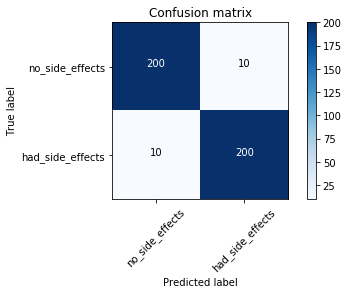

In [56]:
cm_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm, cm_labels)

## Saving the model

In [57]:
#save the model
model.save('practice_project_1.h5')

### this save function saves the:
1. the architechutre of the model. allowing us to recreate the model
2. the weights of the model
3. the training configuration (loss, optimizer)
4. the state of the optimizer, allowing to resume training exactly where you left off.

In [58]:
#loading the saved model
from keras.models import load_model
new_model = load_model('practice_project_1.h5')

In [59]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [60]:
new_model.get_weights()

[array([[-0.4943637 , -0.48408842, -0.14211795, -0.02759173,  0.291293  ,
          0.49418   ,  0.3684625 , -0.424668  ,  0.38925028, -0.10188887,
          0.5140995 , -0.4978906 ,  0.6405927 , -0.05260772,  0.74797565,
         -0.31949493]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        ,  0.19703329, -0.15320797,
        -0.09982008, -0.19259226,  0.        , -0.20400524,  0.        ,
        -0.26022738,  0.        , -0.17691948,  0.        , -0.18681088,
         0.        ], dtype=float32),
 array([[-3.47721189e-01,  9.23188031e-02, -2.42789388e-02,
          1.63324863e-01, -2.38938928e-02, -1.45734698e-01,
         -6.16570413e-02, -1.04842901e-01,  2.48449117e-01,
          2.03952044e-01,  2.05127627e-01, -2.89301455e-01,
          2.77460188e-01,  4.17713225e-02, -9.83101130e-03,
         -1.76445752e-01, -6.45351708e-02,  2.31160551e-01,
         -2.03087032e-02, -2.88194418e-01,  4.10163999e-02,
         -2.69891053e-01,  2.32764989e-01,  2.45683640e-01,
 

In [61]:
new_model.optimizer

### The below method saves only the architeechture of the model and not its weights, training configuration, etc

In [62]:
#save as json
json_string = model.to_json()

In [63]:
json_string

'{"class_name": "Sequential", "config": [{"class_name": "Dense", "config": {"name": "dense_7", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_8", "trainable": true, "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "VarianceScaling", "config": {"scale": 1.0, "mode": "fan_avg", "distribution": "uniform", "seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "b

In [64]:
#load model
from keras.models import model_from_json
model_architecture = model_from_json(json_string)


In [65]:
model_architecture.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### This method saves only the weights

In [66]:
model.save_weights('practice_project_1_weights.h5')

In [67]:
model2 = Sequential([
    Dense(16, input_shape = (1,), activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(2, activation = 'softmax')
])

In [68]:
model2.load_weights('practice_project_1_weights.h5')

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.get_weights()

[array([[-0.4943637 , -0.48408842, -0.14211795, -0.02759173,  0.291293  ,
          0.49418   ,  0.3684625 , -0.424668  ,  0.38925028, -0.10188887,
          0.5140995 , -0.4978906 ,  0.6405927 , -0.05260772,  0.74797565,
         -0.31949493]], dtype=float32),
 array([ 0.        ,  0.        ,  0.        ,  0.19703329, -0.15320797,
        -0.09982008, -0.19259226,  0.        , -0.20400524,  0.        ,
        -0.26022738,  0.        , -0.17691948,  0.        , -0.18681088,
         0.        ], dtype=float32),
 array([[-3.47721189e-01,  9.23188031e-02, -2.42789388e-02,
          1.63324863e-01, -2.38938928e-02, -1.45734698e-01,
         -6.16570413e-02, -1.04842901e-01,  2.48449117e-01,
          2.03952044e-01,  2.05127627e-01, -2.89301455e-01,
          2.77460188e-01,  4.17713225e-02, -9.83101130e-03,
         -1.76445752e-01, -6.45351708e-02,  2.31160551e-01,
         -2.03087032e-02, -2.88194418e-01,  4.10163999e-02,
         -2.69891053e-01,  2.32764989e-01,  2.45683640e-01,
 